In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10**6

In [3]:
ip = np.random.randn(N) > 0.5
ip = np.array(ip) 

In [4]:
s = 2 * ip - 1            

s = np.array(s)

In [5]:
eb_no_db = np.arange(5,25) 

In [6]:
bit_error_rate = np.zeros(len(eb_no_db))

In [7]:
def Zero_Forcing():

    for jj in range(len(eb_no_db)):

        nErr = 0
        
        received_bits_list = []

        for ii in range(N // 2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]

            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])

            Hx = np.dot(H, x)
            
            y = Hx + n * 10 ** (-eb_no_db[jj] / 20)
           
            # Forming the Zero Forcing equalization matrix W = inv(H^H*H)*H^H
            
            H_Hermitian = np.conj(H.T) #H^H
            H_Hermitian_H = np.dot(H_Hermitian, H) #H^H*H
#             condition_number = np.linalg.cond(H_Hermitian_H)
            H_Hermitian_H_inverse = np.linalg.pinv(H_Hermitian_H) #(H^H*H)^-1
            W = np.dot(H_Hermitian_H_inverse, H_Hermitian) #(H^H*H)^-1 * H^H
            x_hat = np.dot(W, y)
            received_bits = np.real(x_hat > 0)
            x = received_bits[0][0]
            z = received_bits[1][0]

            received_bits_list.append(x)
            received_bits_list.append(z)

        nErr = np.sum(ip != received_bits_list)
        bit_error_rate[jj] = nErr / N
        
        

    return bit_error_rate



#     cnt=0
#     for x in range(0,len(result),2):        
#             if result[x] == ip[x] and result[x+1] == ip[x+1]:
#                 continue
#             cnt+=1
            
#     print("total error:",cnt)
    
    

[0.069204 0.055363 0.044167 0.035132 0.028345 0.022379 0.017698 0.014171
 0.011559 0.008918 0.007203 0.0058   0.004511 0.003519 0.002834 0.002342
 0.00174  0.001377 0.001131 0.000954]


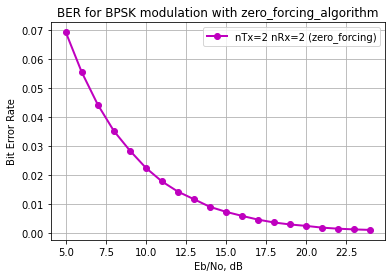

In [8]:
result = Zero_Forcing()
print(result)
plt.figure()
plt.plot(eb_no_db, result, 'mo-', linewidth=2, label='nTx=2 nRx=2 (zero_forcing)')
plt.grid(True)
plt.legend()

plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()